In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("/config/workspace/dataset/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data["BMI"] = data["BMI"].replace(0,data["BMI"].mean())
data["BloodPressure"] = data["BloodPressure"].replace(0,data["BloodPressure"].mean())
data["Glucose"] = data["Glucose"].replace(0,data["Glucose"].mean())
data["Insulin"] = data["Insulin"].replace(0,data["Insulin"].mean())
data["SkinThickness"] = data["SkinThickness"].replace(0,data["SkinThickness"].mean())

In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

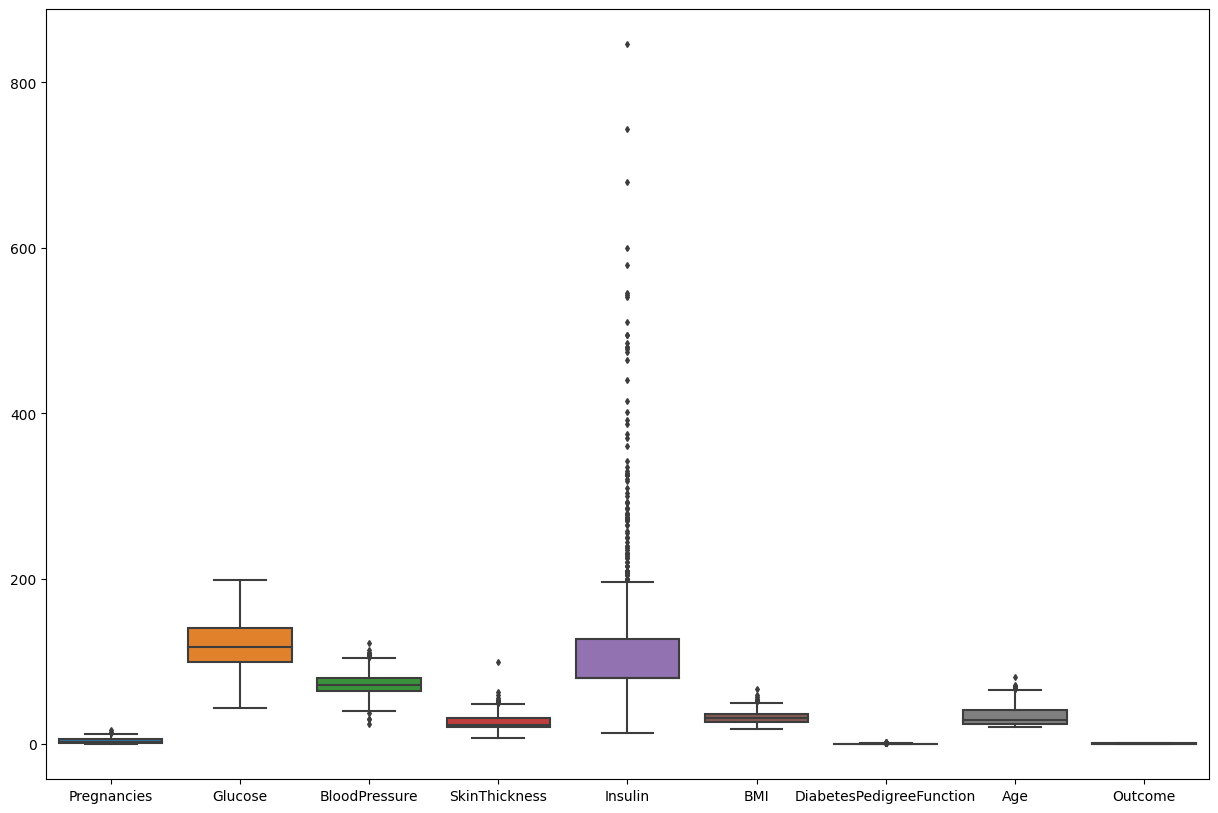

In [9]:
fig,ax = plt.subplots(figsize=(15,10))
sns.boxplot(data = data,ax = ax,fliersize =3)

In [10]:
x = data.drop(columns = ['Outcome'])
y = data['Outcome']

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [12]:
import pickle
def standard_scaling(x_train,x_test):
    scalar = StandardScaler()
    x_train_scaled = scalar.fit_transform(x_train)
    x_test_scaled = scalar.transform(x_test)
    
    file = open("/config/workspace/models/standarddcalar.pkl","wb")
    pickle.dump(scalar,file)
    file.close()
    
    return x_train_scaled,x_test_scaled

In [13]:
x_train_scaled,x_test_scaled = standard_scaling(x_train,x_test)

In [14]:
x_train_scaled

array([[ 2.80346794,  0.24258793, -0.25110513, ...,  1.10366684,
         0.29608546,  0.96352088],
       [ 0.07832678,  0.24258793,  1.14476384, ...,  0.40523314,
        -0.70087555, -0.86295593],
       [-0.22446668, -2.01997244,  0.81427371, ...,  0.30337823,
        -0.66548048,  1.13747105],
       ...,
       [ 1.89508755, -0.68905457,  1.14476384, ...,  1.93305686,
         1.96850229,  0.44167036],
       [-1.13284707,  0.64186329, -0.25110513, ...,  1.46743439,
        -0.77756486, -0.34110542],
       [-1.13284707,  0.10949615,  1.97098917, ..., -1.42815531,
        -0.6094383 , -1.03690611]])

In [15]:
log_reg = LogisticRegression()
log_reg.fit(x_train_scaled,y_train)

LogisticRegression()

In [16]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
parameters = {'penalty':['l1','l2'],
             'C':np.logspace(-3,3,7),
             'solver':['newton-cg','lbfgs','liblinear']}

In [17]:
logreg = LogisticRegression()
clf = GridSearchCV(logreg,param_grid=parameters,
                  scoring = 'accuracy',
                  cv = 10)
clf.fit(x_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [18]:
clf.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [19]:
clf.best_score_

0.7759225650332727

In [20]:
y_pred_clf = clf.predict(x_test_scaled)

In [21]:
print(accuracy_score(y_pred_clf,y_test))
print(confusion_matrix(y_pred_clf,y_test))

0.7291666666666666
[[99 28]
 [24 41]]


In [22]:
log_reg = LogisticRegression(C= 0.1, penalty= 'l1', solver= 'liblinear')

In [23]:
log_reg.fit(x_train_scaled,y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [24]:
y_pred = log_reg.predict(x_test_scaled)

In [25]:
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.7291666666666666
[[99 28]
 [24 41]]


In [26]:
from sklearn.metrics import f1_score
print(f1_score(y_pred,y_test))

0.6119402985074627


In [41]:
file = open('/config/workspace/models/modelforprediction.pkl',"wb")
pickle.dump(log_reg,file)
file.close()

In [4]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')